In [12]:
import numpy as np 
import pandas as pd 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import set_option
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import classification_report
import seaborn as sns

In [13]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Tải xuống tập dữ liệu

In [14]:
BankCredit = pd.read_csv("UCI_Credit_Card.csv")

Sử dụng thuộc tính shape của Pandas Dataframe để kiểm tra hình dạng của khung dữ liệu

In [15]:
print(f'The shape of the dataframe is {BankCredit.shape}')
print()

The shape of the dataframe is (30000, 25)



Sử dụng hàm info() của Pandas Dataframe để hiển thị kiểu dữ liệu của từng cột

In [16]:
print(BankCredit.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Sử dụng hàm replace để thay thế ? bằng Numpy NaN. sử dụng thuộc tính inplace để thay thế khung dữ liệu gốc

In [17]:
BankCredit.replace(to_replace='?', value=np.NaN, inplace=True)

AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.

Sử dụng describe để xem tóm tắt mô tả về các đặc trưng của tập dữ liệu

In [8]:
print(BankCredit.describe(include='all'))
print()

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

<h3>Phân tích dữ liệu thăm dò</h3>
<p>+ Sử dụng phương thức value_counts() để đếm số lượng danh mục</p>
<p>+ Sử dụng isnull để kiểm tra các giá trị null trong tập dữ liệu</p>

In [9]:
print(BankCredit['default.payment.next.month'].value_counts())
print(BankCredit.isnull().sum())

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Sử dụng phương pháp biểu đồ đếm của thư viện seaborn để hiển thị biểu đồ Bar 

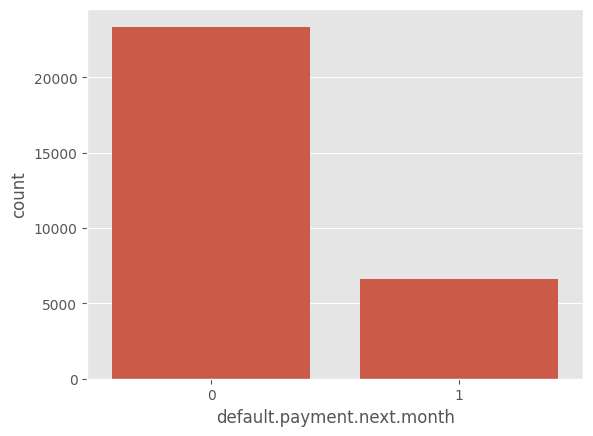

In [10]:
sns.countplot(x='default.payment.next.month', data=BankCredit, linewidth=3)
plt.show()

sử dụng phương pháp hist để hiển thị biểu đồ histogram của các đặc trưng được chọn cho khung dữ liệu

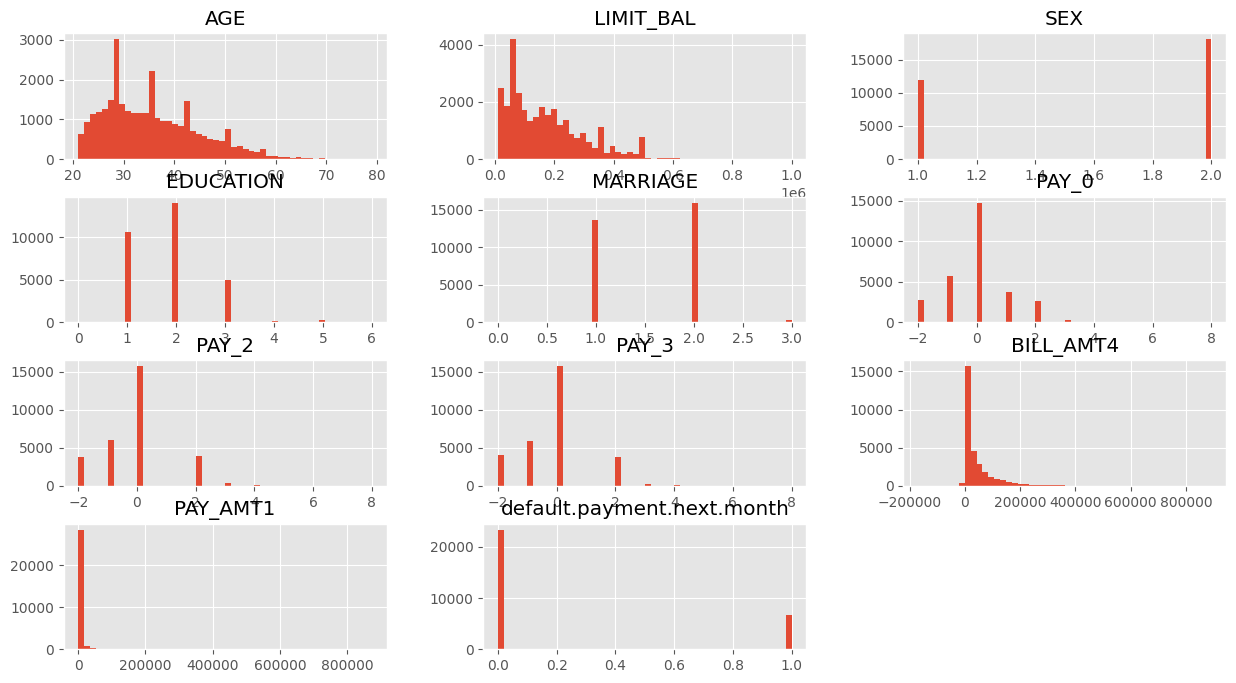

In [11]:
BankCredit[['AGE', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT4', 'PAY_AMT1', 'default.payment.next.month']].hist(bins=50, figsize=(15,8))
plt.show()

Kiểm tra dữ liệu còn null không

In [18]:
print(BankCredit.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


Để khai báo biến độc lập (X) và biến phụ thuộc (y), sử dụng phương thức drop() để xóa các đặc điểm ['ID','default.payment.next.month'] 
<br>và sử dụng các đặc điểm còn lại làm các đặc điểm độc lập. Sử dụng ['CreditCard'] làm biến phụ thuộc.

In [19]:
X = BankCredit.drop(['ID','default.payment.next.month'], axis=1)
y = BankCredit['default.payment.next.month']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

<h1>Mô hình Naive Bayes</h1>
sử dụng một lớp mã hóa từ sklearn.preprocessing để thực hiện một Hot Encoding của các biến phân loại

In [21]:
from sklearn.preprocessing import OneHotEncoder
cols = ['SEX', 'EDUCATION', 'MARRIAGE']
encoder = OneHotEncoder(sparse=False)
X_train = encoder.fit_transform(X_train[cols])
X_test = encoder.transform(X_test[cols])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

sử dụng MinMaxScaler để chuyển đổi các tính năng độc lập của dữ liệu training và testing.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sử dụng lớp GaussianNB từ sklearn.naive_bayes để tạo một phiên bản của thuật toán.

In [23]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()

huấn luyện mô hình Gaussian Naive Bayes bằng phương thức fit

In [24]:
model_gnb.fit(X_train, y_train)

GaussianNB()

Thực hiện dự đoán trên tập kiểm tra và đo độ chính xác của mô hình

In [25]:
y_pred = model_gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'Model accuracy score: {100*accuracy_score(y_test, y_pred):0.2f}%')
print()

Model accuracy score: 73.36%



sử dụng lớp confusion_matrix từ sklearn.metrics để tính toán ma trận nhầm lẫn cho mô hình.

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[ 125 6884]
 [   9 1982]]


Accuracy = (Số dự đoán đúng/ tổng số duwjw đ0án)
Số dự đoán đúng: là tổng của các giá trị trên đường chéo chính của ma trận nhầm lẫn (125 + 1982 = 2107).
Tổng số dự đoán: là tổng của tất cả các phần tử trong ma trận (125 + 6884 + 9 + 1982 = 9000).
Accuracy = (2107/ 9000) x 100 = 23.41%